# Path algorithm  

The solution path algorithm is useful when the user does not have a pre-specified grid of tuning parameter values and the cofficient estimates at more than a handful of values of the tuning parameter are desired.  

## Sum-to-zero constraint 

In this example, we will solve a problem defined by 

$$\begin{split}
& \text{minimize} \hspace{1em} \frac 12||\boldsymbol{y}-\boldsymbol{X\beta}||^2_2 + \rho||\boldsymbol{\beta}||_1  \\
& \text{subject to} \hspace{1em} \sum_j \beta_j = 0
\end{split}$$

Note that we can re-write the constraint as $\boldsymbol{A\beta} = \boldsymbol{b}$ where 

$$\boldsymbol{A} = \begin{pmatrix} 1 & 1 & \cdots & 1 \end{pmatrix} \text{ and } \boldsymbol{b} = 0.$$

First let's generate the predictor matrix `X` and response vector `y`. To do so, we need a true parameter vector `β` whose sum equals to 0. Note `n` is the number of observations `n` and `p` is the number of predictors. 

In [1]:
n, p = 50, 100  
β = zeros(p)
β[1:round(Int, p / 4)] = 0
β[(round(Int, p / 4) + 1):round(Int, p / 2)] = 1
β[(round(Int, p / 2) + 1):round(Int, 3p / 4)] = 0
β[(round(Int, 3p / 4) + 1):p] = -1
srand(41)
X = randn(n, p)

50×100 Array{Float64,2}:
  1.21212    -0.153889    0.141533  …  -0.458125    0.0951976  -2.14019   
  0.345895    1.30676     1.60944      -0.409901    0.323719    0.989333  
 -1.27859    -1.18894     0.512064      1.80509     1.62606    -1.44251   
  0.230616    2.54741    -0.523533      2.73358     1.07999     0.432834  
 -1.17103    -0.39082     0.441921     -0.179239   -0.158189   -0.640611  
  1.67135     0.0829011   0.964089  …  -0.720038    1.99359    -0.671572  
 -0.614717    2.16204    -0.0602       -0.324456   -0.616887    1.11243   
 -0.810535    0.974719   -0.045405      0.881578    1.29611     0.696869  
 -1.10879    -1.32489    -1.18272       0.579381   -0.971269   -0.687591  
 -0.219752   -0.447897   -0.974186     -0.880804   -0.480702   -1.36887   
  0.0952544  -0.126203   -0.273737  …  -0.264421    0.565684   -0.798719  
  1.4126      0.295896   -0.213161     -1.46343    -1.27144    -0.0589753 
 -0.418407   -0.479389    0.324243      1.96976     0.867659   -1.2999    


In [2]:
y = X * β + randn(n)

50-element Array{Float64,1}:
  -9.90585 
  -5.40562 
   5.24289 
  -6.29951 
  -4.9586  
  -6.1342  
  -7.90981 
   2.51009 
  -5.79548 
   1.61355 
  -0.722766
  10.4522  
   4.03935 
   ⋮       
   0.397781
  -2.6661  
   5.36896 
  -3.56537 
  -2.402   
   0.11478 
  -5.39248 
   4.38391 
   0.706801
 -10.1066  
  -1.12558 
  14.2473  

Since the problem has equality constraints only, we define the constraints as below. 

In [4]:
beq = 0.0
Aeq = ones(1, p)

1×100 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
using ConstrainedLasso
β̂path1, ρpath1, objpath, = lsq_classopath(X, y; Aeq = Aeq, beq = beq);

Now we are ready to obtain the solution path using the path algorithm. 

In [9]:
β̂path1

100×64 Array{Float64,2}:
 0.0  0.0   0.0         0.0        …   0.0        0.0        0.0     
 0.0  0.0   0.0         0.0            0.2093     0.215544   0.222576
 0.0  0.0   0.0         0.0            0.0        0.0        0.0     
 0.0  0.0   0.0         0.0           -0.375203  -0.411589  -0.41253 
 0.0  0.0   0.0         0.0            0.0        0.0        0.0     
 0.0  0.0   0.0         0.0        …   0.0        0.0        0.0     
 0.0  0.0   0.0         0.0            0.0        0.0        0.0     
 0.0  0.0   0.0         0.0            0.0        0.0        0.0     
 0.0  0.0   0.0         0.0            0.326206   0.349339   0.355867
 0.0  0.0   0.0         0.0           -0.199751  -0.18084   -0.180896
 0.0  0.0   0.0         0.0        …   0.0        0.0        0.0     
 0.0  0.0   0.0         0.0            0.0        0.0        0.0     
 0.0  0.0   0.0         0.0            0.0        0.0        0.0     
 ⋮                                 ⋱                             

Let's see if sums of coefficients at all $\rho$ values are approximately 0. 

In [8]:
all(abs.(sum(β̂path1, 1)) .< 1e-8)

true

We plot the solution path below. 


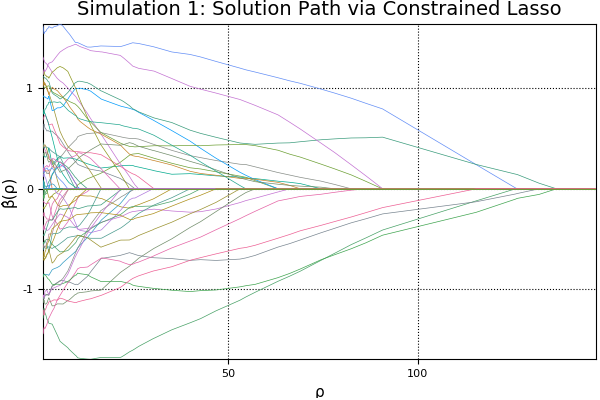

In [17]:
using Plots; pyplot();
plot(ρpath1, β̂path1', label="", xaxis = ("ρ", (minimum(ρpath1),
      maximum(ρpath1))), yaxis = ("β̂(ρ)"), width=0.5) 
title!("Simulation 1: Solution Path via Constrained Lasso") 

In [ ]:
savefig("misc/sumtozero.svg")

Note the figure above is markedly more smooth than in the [figure](fixedparam.md#figparam) obtained from passing in a sequence of tuning parameter values. This is because the solution path algorithm captures all events. 

## Non-negativity constraint 

In this example, the problem is defined by 

 
$$\begin{split}
& \text{minimize} \hspace{1em} \frac 12||\boldsymbol{y}-\boldsymbol{X\beta}||^2_2 + \rho||\boldsymbol{\beta}||_1  \\
& \text{subject to} \hspace{1em} \beta_j \geq 0 \forall j
\end{split}$$

We can re-write the inequality constraint as
$\boldsymbol{C\beta} \leq \boldsymbol{d}$ where 


$$\boldsymbol{C} = \begin{pmatrix} 
-1 & & & \\
	& -1 & & \\
	&   & \ddots & \\
	& 	& 	& -1
\end{pmatrix}
\text{ and } \boldsymbol{d} = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{pmatrix}$$

First we define a true parameter vector `β` that is sparse with a few non-zero coefficients. Let `n` and `p` be the number of observations and predictors, respectively. 

In [12]:
n, p = 50, 100   
β = zeros(p)
β[1:10] = 1:10
srand(41)
X = randn(n, p)

50×100 Array{Float64,2}:
  1.21212    -0.153889    0.141533  …  -0.458125    0.0951976  -2.14019   
  0.345895    1.30676     1.60944      -0.409901    0.323719    0.989333  
 -1.27859    -1.18894     0.512064      1.80509     1.62606    -1.44251   
  0.230616    2.54741    -0.523533      2.73358     1.07999     0.432834  
 -1.17103    -0.39082     0.441921     -0.179239   -0.158189   -0.640611  
  1.67135     0.0829011   0.964089  …  -0.720038    1.99359    -0.671572  
 -0.614717    2.16204    -0.0602       -0.324456   -0.616887    1.11243   
 -0.810535    0.974719   -0.045405      0.881578    1.29611     0.696869  
 -1.10879    -1.32489    -1.18272       0.579381   -0.971269   -0.687591  
 -0.219752   -0.447897   -0.974186     -0.880804   -0.480702   -1.36887   
  0.0952544  -0.126203   -0.273737  …  -0.264421    0.565684   -0.798719  
  1.4126      0.295896   -0.213161     -1.46343    -1.27144    -0.0589753 
 -0.418407   -0.479389    0.324243      1.96976     0.867659   -1.2999    


In [13]:
y = X * β + randn(n)

50-element Array{Float64,1}:
  12.6173  
  40.3776  
   2.2169  
  27.4631  
  38.592   
   7.82023 
  22.7367  
   7.88475 
  -7.47037 
   0.621035
  -4.91899 
 -14.9363  
   8.26901 
   ⋮       
   7.83882 
  -9.30699 
 -29.7205  
  15.2482  
 -19.1784  
  14.9865  
   2.32728 
  -9.11988 
 -15.3472  
  22.9679  
  -0.997964
  42.6068  

Now set up the inequality constraint for the problem.

In [14]:
bineq = zeros(p)
Aineq = - eye(p)

100×100 Array{Float64,2}:
 -1.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -1.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -1.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -1.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -1.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -1.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0

Now we are ready to obtain the solution path using the path algorithm.

In [ ]:
β̂path2, ρpath2, = lsq_classopath(X, y; Aineq = Aineq, bineq = bineq) 

In [16]:
β̂path2

100×183 Array{Float64,2}:
 0.0         0.0      0.0      0.0      …  0.783939   0.791708   0.796529 
 0.0         0.0      0.0      0.0         2.17561    2.18099    2.18875  
 0.0         0.0      0.0      0.0         2.99935    3.008      3.01471  
 0.0         0.0      0.0      0.0         4.30984    4.31056    4.30849  
 0.0         0.0      0.0      0.0         4.98995    4.99358    4.9955   
 0.0         0.0      0.0      0.0      …  6.18666    6.18814    6.18596  
 0.0         0.0      0.0      0.0         6.92076    6.92371    6.92749  
 0.0         0.0      0.0      0.0         8.56963    8.55907    8.54642  
 0.0         0.0      0.0      0.0         8.86323    8.864      8.86137  
 0.00616069  2.01444  2.41323  2.42264     9.8864     9.89486    9.90491  
 0.0         0.0      0.0      0.0      …  0.0        0.0        0.0      
 0.0         0.0      0.0      0.0         0.0        0.0        0.0      
 0.0         0.0      0.0      0.0         0.0        0.0        0.0      

We plot the solution path below. 


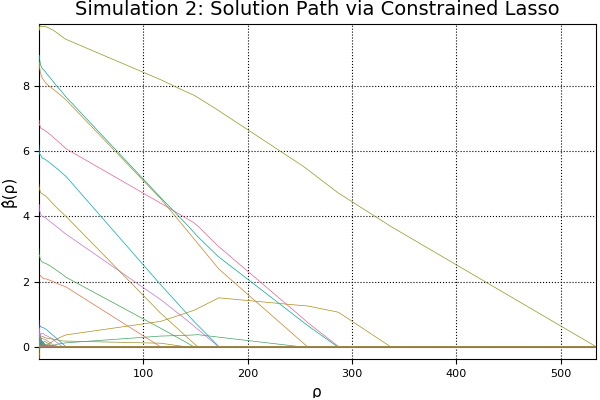

In [19]:
plot(ρpath2, β̂path2', label="", xaxis = ("ρ", (minimum(ρpath2),
      maximum(ρpath2))), yaxis = ("β̂(ρ)"), width=0.5) 
title!("Simulation 2: Solution Path via Constrained Lasso") 

*Follow the [link](https://github.com/Hua-Zhou/ConstrainedLasso.jl/blob/master/docs/src/demo/path.ipynb) to access the .ipynb file of this page.*